In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Load Dataset and inspect the dataset


In [3]:
df = pd.read_csv("C:/Users/sinha shubham/Downloads/Housing (1).csv")
df.head()
df.info()
df.describe()
df.columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'furnishingstatus'],
      dtype='object')

## Check for Missing Values

In [4]:

null_percentage = df.isnull().sum() / len(df) * 100
print(null_percentage)

# Drop columns with > 40% missing (none in this dataset)
df.drop(columns=null_percentage[null_percentage > 40].index, inplace=True)

# Drop rows with more than 2 missing values
df = df[df.isnull().sum(axis=1) <= 2]

# Fill remaining nulls with median
df.fillna(df.median(numeric_only=True), inplace=True)

price               0.0
area                0.0
bedrooms            0.0
bathrooms           0.0
stories             0.0
mainroad            0.0
guestroom           0.0
basement            0.0
hotwaterheating     0.0
airconditioning     0.0
parking             0.0
prefarea            0.0
furnishingstatus    0.0
dtype: float64


## Outlier Detection

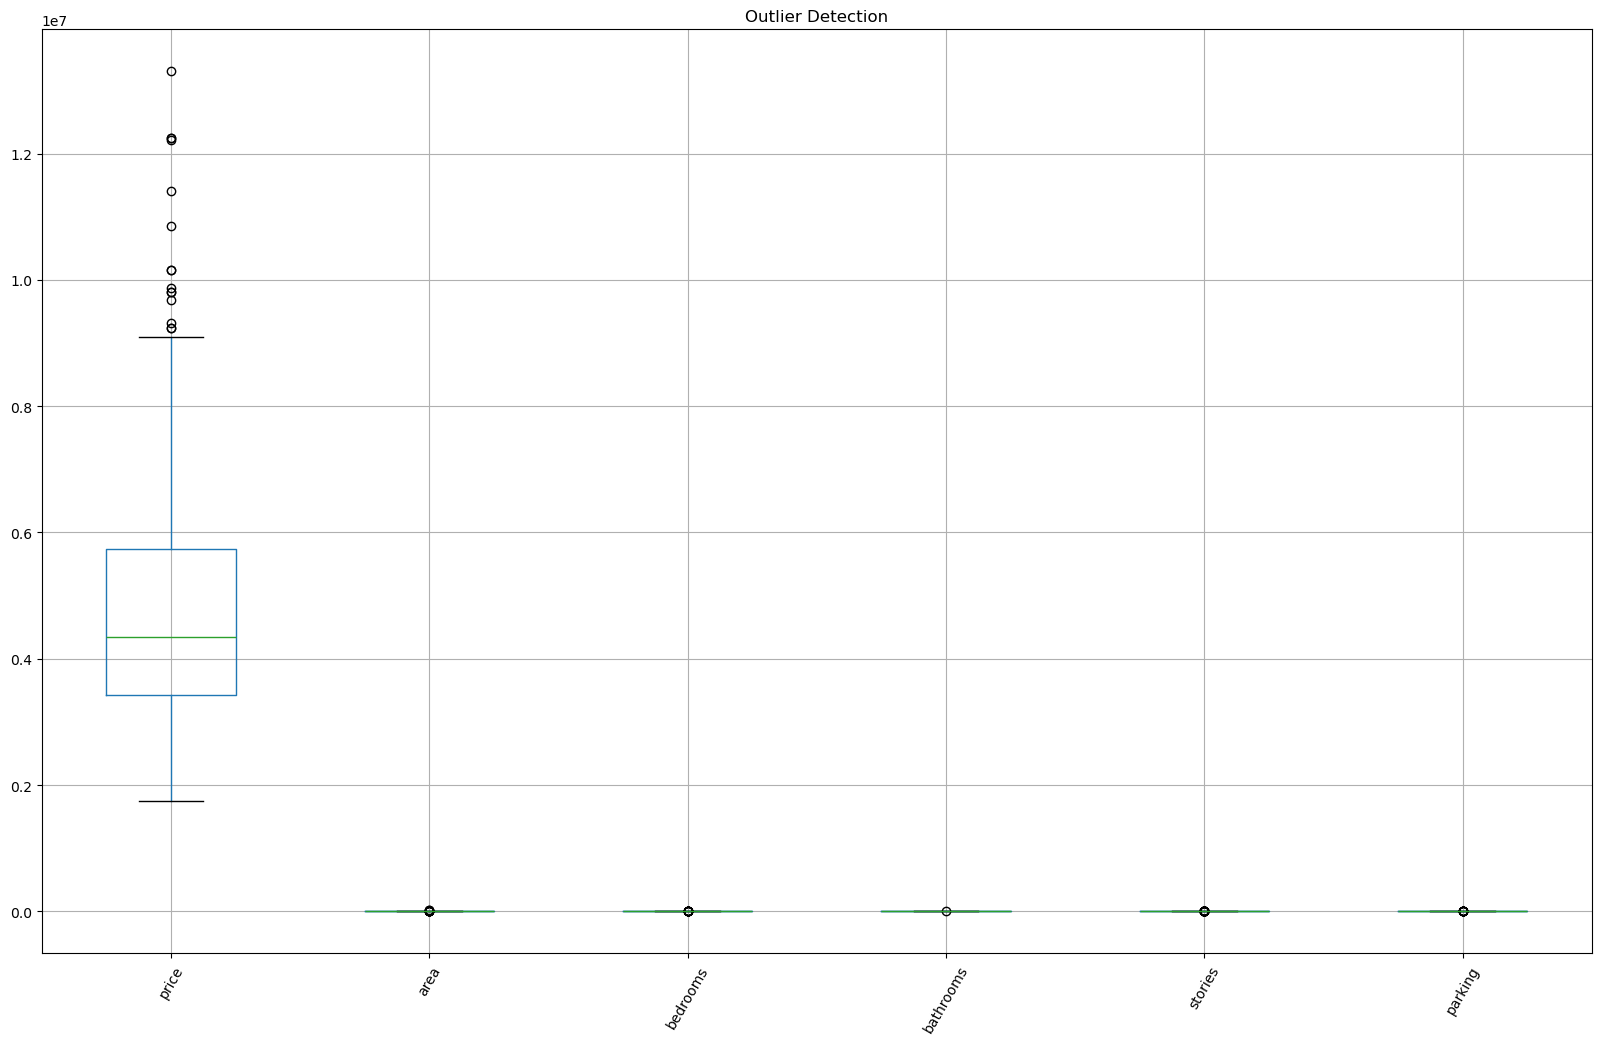

In [5]:
plt.figure(figsize=(20, 12))
df.select_dtypes(include=np.number).boxplot(rot=60)
plt.title("Outlier Detection")
plt.show()


## Sort the table

In [7]:
df.sort_values(by="price", ascending=False).head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


## Classify Price  Quality into different sector levels

In [8]:
# Classify price into 4 levels
df['Price_Level'] = pd.qcut(df['price'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Quality is not a column, so skip or create one from other feature like 'bedrooms'
df['Quality_Level'] = pd.cut(df['bedrooms'], bins=[0, 2, 4, 10], labels=['Low', 'Medium', 'High'])

In [9]:
# Encode Categorical Variables

df = pd.get_dummies(df, drop_first=True)

## Train-Test Split

In [10]:
X = df.drop(["price"], axis=1)
y = df["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train Models

In [11]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeRegressor()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# SVM
svr = SVR()
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

## Evaluate Models

In [12]:
def evaluate_model(y_test, y_pred, model_name):
    print(f"{model_name} Evaluation:")
    print("R2 Score:", r2_score(y_test, y_pred))
    print("MAE:", mean_absolute_error(y_test, y_pred))
    print("MSE:", mean_squared_error(y_test, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
    print("="*50)

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_dt, "Decision Tree")
evaluate_model(y_test, y_pred_svr, "SVM")

Linear Regression Evaluation:
R2 Score: 0.8054133176587975
MAE: 616372.5026605872
MSE: 983552054899.695
RMSE: 991741.9295863692
Decision Tree Evaluation:
R2 Score: 0.7380040799472932
MAE: 676471.6513761468
MSE: 1324276782166.055
RMSE: 1150772.2546907598
SVM Evaluation:
R2 Score: -0.10156414377502854
MAE: 1763890.4662379217
MSE: 5567933345581.994
RMSE: 2359646.8688305872


## Residual Analysis (For Linear Regression)

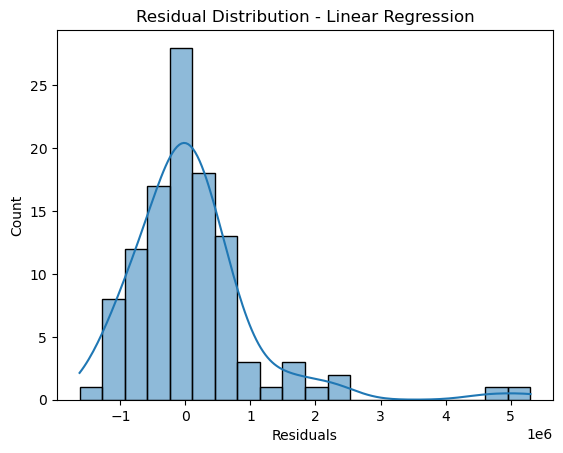

In [13]:
residuals = y_test - y_pred_lr

sns.histplot(residuals, kde=True)
plt.title("Residual Distribution - Linear Regression")
plt.xlabel("Residuals")
plt.show()


## Error graph to make understand the error percentage

 

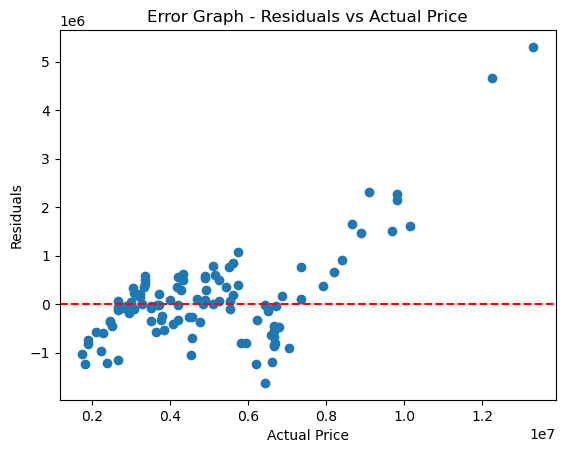

In [14]:
plt.scatter(y_test, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Error Graph - Residuals vs Actual Price")
plt.xlabel("Actual Price")
plt.ylabel("Residuals")
plt.show()


## Compare the outliers and error graph in different levels.

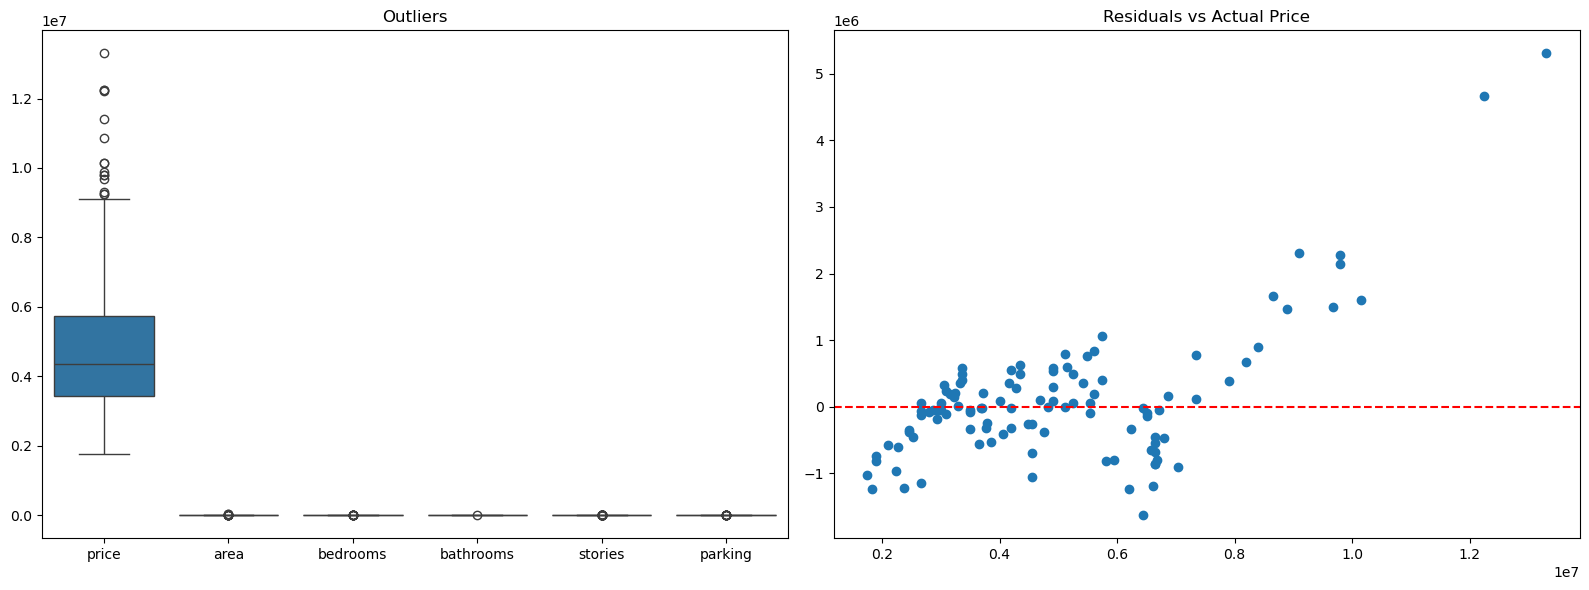

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(16, 6))

# Boxplot
sns.boxplot(data=df.select_dtypes(include=np.number), ax=axs[0])
axs[0].set_title("Outliers")

# Error graph
axs[1].scatter(y_test, residuals)
axs[1].axhline(0, color='red', linestyle='--')
axs[1].set_title("Residuals vs Actual Price")

plt.tight_layout()
plt.show()